In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data

In [2]:
names = ['Age', 'Gender', 'Job', 'Market']

dataset = pd.read_csv('data/WKW_marketingcampaign_event1.csv', names=names)

Job
Employee     AxesSubplot(0.125,0.125;0.775x0.755)
Freelance    AxesSubplot(0.125,0.125;0.775x0.755)
Student      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

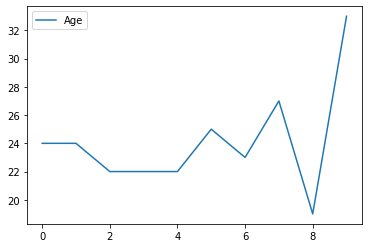

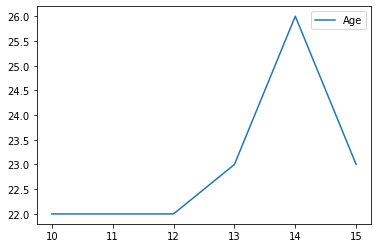

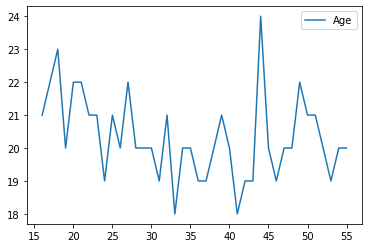

In [3]:
dataset.groupby('Job')..line()

Market
Community Partner    AxesSubplot(0.125,0.125;0.775x0.755)
INVITED DELEGATE     AxesSubplot(0.125,0.125;0.775x0.755)
Influencer           AxesSubplot(0.125,0.125;0.775x0.755)
PP                   AxesSubplot(0.125,0.125;0.775x0.755)
Social Media Ads     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

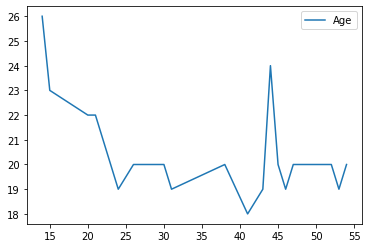

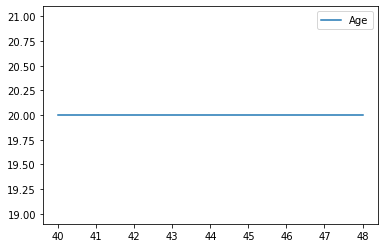

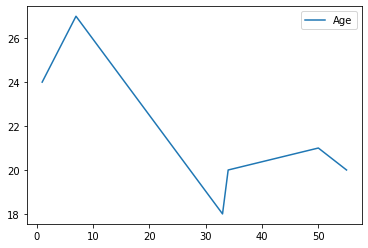

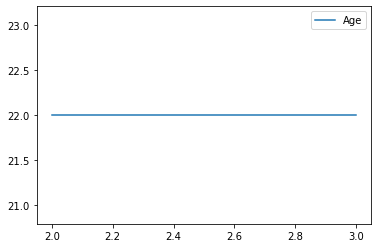

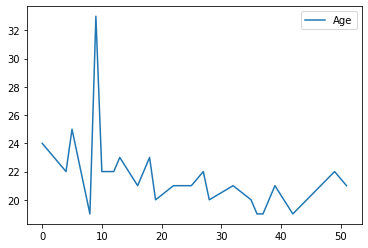

In [4]:
dataset.groupby('Market').plot.line()

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TRAINING

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

TESTING

In [11]:
y_pred = classifier.predict(X_test)

# EVALUATING

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 1 0 0 2]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 1 1 4]]
                   precision    recall  f1-score   support

Community Partner       0.33      0.25      0.29         4
 INVITED DELEGATE       0.00      0.00      0.00         0
       Influencer       0.00      0.00      0.00         1
               PP       0.00      0.00      0.00         0
 Social Media Ads       0.67      0.57      0.62         7

         accuracy                           0.42        12
        macro avg       0.20      0.16      0.18        12
     weighted avg       0.50      0.42      0.45        12



C:\Users\ihuda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ihuda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ihuda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

# Error Rate

Text(0, 0.5, 'Error rata-rata')

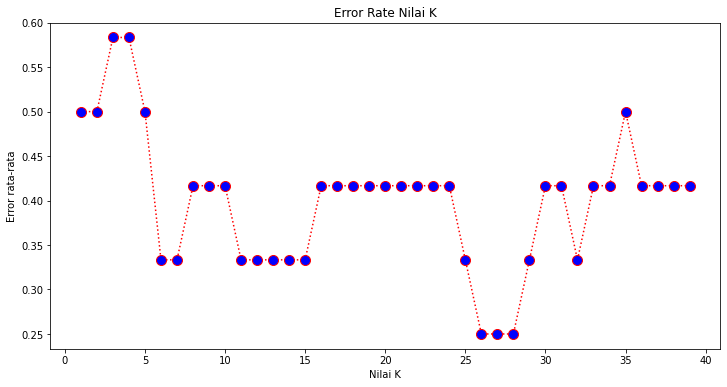

In [13]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dotted', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error rata-rata')

# PREDICT

In [14]:
"""
predict(Employee,Freelance,Student,Age,Gender)
Employee 0/1
Freelance 0/1
Student 0/1
Age int
Gender 0 = Female / 1 = Male
"""
input = [[1,0,0,19,1]]
input = scaler.transform(input)

In [15]:
result = classifier.predict(input)
print("Market : " + result)

['Market : PP']
